In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

In [3]:
# Starting URL for Weather Map API Call
# api_key = api_keys.api_key
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key + "&q=london"
# response = requests.get(url).json()
# response


In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

city_data = []
    

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

for city_name in cities:
    params = {
        'appid' : api_key,
        'q' : city_name,
    }
    try:
        response = requests.get(url, params=params).json()
        print(f"Processing Record of|{city_name}")
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        long = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        
        city_data.append({
            
            'City':city_name,
            'Cloudiness':cloudiness,
            'Country':country,
            'date':date,
            'Humidity':humidity,
            'lat':lat,
            'lng':long,
            'Max_Temp':max_temp,
            'Wind_speed':wind_speed
        })

    except:
        
        pass



Processing Record of|yanam
Processing Record of|taolanaro
Processing Record of|koubia
Processing Record of|alihe
Processing Record of|east london
Processing Record of|lagoa
Processing Record of|nabire
Processing Record of|tasiilaq
Processing Record of|stelle
Processing Record of|bluff
Processing Record of|manisa
Processing Record of|esperance
Processing Record of|samusu
Processing Record of|lazaro cardenas
Processing Record of|kamenka
Processing Record of|hobart
Processing Record of|vikulovo
Processing Record of|atuona
Processing Record of|albany
Processing Record of|lusambo
Processing Record of|klaksvik
Processing Record of|jamestown
Processing Record of|turmalina
Processing Record of|tawkar
Processing Record of|tumannyy
Processing Record of|saint-augustin
Processing Record of|ushuaia
Processing Record of|busselton
Processing Record of|kalmunai
Processing Record of|gazojak
Processing Record of|hermanus
Processing Record of|rikitea
Processing Record of|yozgat
Processing Record of|verkh

Processing Record of|ranau
Processing Record of|verkhoyansk
Processing Record of|rungata
Processing Record of|meyungs
Processing Record of|mapiripan
Processing Record of|strezhevoy
Processing Record of|caravelas
Processing Record of|kamenskoye
Processing Record of|talara
Processing Record of|ancud
Processing Record of|melivoia
Processing Record of|mutsamudu
Processing Record of|palana
Processing Record of|seybaplaya
Processing Record of|waingapu
Processing Record of|gorontalo
Processing Record of|erenhot
Processing Record of|nakamura
Processing Record of|nuevo progreso
Processing Record of|opuwo
Processing Record of|rocha
Processing Record of|shuyskoye
Processing Record of|jyvaskyla
Processing Record of|sao joao da barra
Processing Record of|ileza
Processing Record of|monrovia
Processing Record of|bud
Processing Record of|hargeysa
Processing Record of|hovd
Processing Record of|mandera
Processing Record of|half moon bay
Processing Record of|atar
Processing Record of|leua
Processing Reco

Processing Record of|yarmouth
Processing Record of|alugan
Processing Record of|peremyshlyany
Processing Record of|kapoeta
Processing Record of|jaque
Processing Record of|deniliquin
Processing Record of|bobon
Processing Record of|makushino
Processing Record of|kusye-aleksandrovskiy
Processing Record of|muros
Processing Record of|presidencia roque saenz pena
Processing Record of|umzimvubu
Processing Record of|luangwa
Processing Record of|kahului
Processing Record of|fort stewart
Processing Record of|meinerzhagen
Processing Record of|abu kamal
Processing Record of|dovers
Processing Record of|ust-kamchatsk
Processing Record of|lakes entrance
Processing Record of|zarubino
Processing Record of|phek
Processing Record of|tulun
Processing Record of|valparaiso
Processing Record of|jalu
Processing Record of|asyut
Processing Record of|fereydun kenar
Processing Record of|san patricio
Processing Record of|of
Processing Record of|hondo
Processing Record of|goderich
Processing Record of|nandigama
Proc

In [16]:
data = pd.DataFrame(city_data)
df = data[['City', 'Cloudiness','Humidity','Max_Temp','Wind_speed','lat']]

# data.count()
data.to_csv('weather_data.csv', sep='\t', encoding='utf-8')
data.head()

,City,Cloudiness,Country,Humidity,Max_Temp,Wind_speed,date,lat,lng
0,yanam,92,IN,95,75.80,14.03,1535238427,16.73,82.22
1,koubia,92,GN,98,67.07,2.51,1535238427,11.59,-11.89
2,alihe,92,CN,85,64.19,3.51,1535238404,50.57,123.73
3,east london,44,ZA,94,68.87,13.02,1535238161,-33.02,27.91
4,lagoa,0,PT,25,84.20,5.82,1535236200,37.14,-8.45


### Matplotlib to create the visualization 

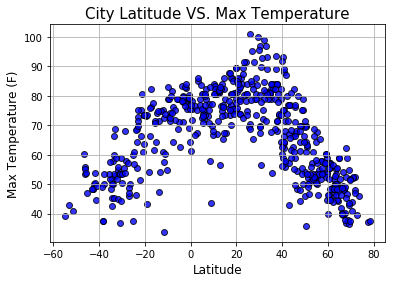

In [17]:
x = df['lat']
y = df['Max_Temp']
plt.scatter(x, y,marker="o",edgecolors="black",alpha=.80,c='blue')
plt.title('City Latitude VS. Max Temperature', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)
plt.grid(True)
plt.savefig('Max Temperature.png')

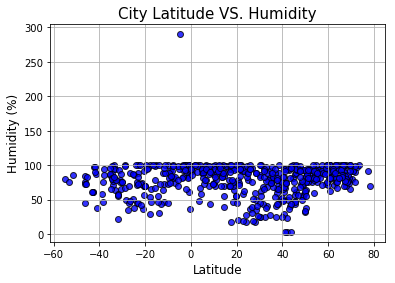

In [18]:
x = df['lat']
y = df['Humidity']
plt.scatter(x, y,marker="o",edgecolors="black",alpha=.80,c='blue')
plt.title('City Latitude VS. Humidity', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.grid(True)
plt.savefig('Humidity.png')

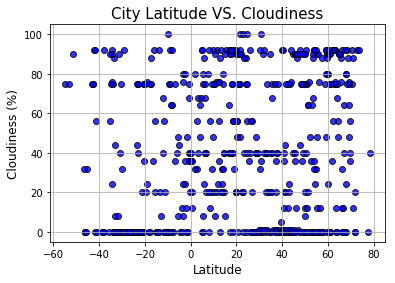

In [19]:
x = df['lat']
y = df['Cloudiness']
plt.scatter(x, y,marker="o",edgecolors="black",alpha=.80,c='blue')
plt.title('City Latitude VS. Cloudiness', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.grid(True)
plt.savefig('Cloudiness.png')

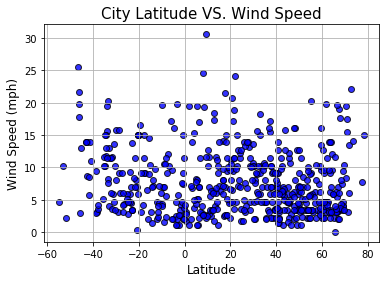

In [20]:
x = df['lat']
y = df['Wind_speed']
plt.scatter(x, y,marker="o",edgecolors="black",alpha=.80,c='blue')
plt.title('City Latitude VS. Wind Speed', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.grid(True)
plt.savefig('Wind Speed.png')